In [10]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [11]:
sumno2 = pd.read_csv(
    'NO2_summary.csv', 
    index_col='Date Local',
    parse_dates=["Date Local"],
)

sumno2['Arithmetic Mean cleaned'] = ''
sumno2['Arithmetic Mean cleaned'] = sumno2['Arithmetic Mean'].apply(lambda x : x if x > 0 else 0)
# datemask.loc[datemask['Arithmetic Mean'] < 0, 'Arithmetic Mean'] = 0  #replace negative values to 0 (original under the cell)

sumno2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92692 entries, 2020-01-01 to 2020-01-25
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State Code               92692 non-null  int64  
 1   County Code              92692 non-null  int64  
 2   Site Num                 92692 non-null  int64  
 3   Parameter Code           92692 non-null  int64  
 4   POC                      92692 non-null  int64  
 5   Latitude                 92692 non-null  float64
 6   Longitude                92692 non-null  float64
 7   Datum                    92692 non-null  object 
 8   Parameter Name           92692 non-null  object 
 9   Sample Duration          92692 non-null  object 
 10  Pollutant Standard       92692 non-null  object 
 11  Units of Measure         92692 non-null  object 
 12  Event Type               92692 non-null  object 
 13  Observation Count        92692 non-null  int64  
 14  Obser

In [12]:
datemask = sumno2.loc['2020-05-01':'2020-12-31']
# save the datemask to a new csv file
datemask.to_csv('NO22020MaytoDec.csv')

print(datemask["County Name"].unique())

datemask['Arithmetic Mean cleaned'].describe()  #check
#datemask['AQI'].describe()  #no negative values in AQI, so no need to change 

['Jefferson' 'Maricopa' 'Pima' 'Crittenden' 'Pulaski' 'Alameda' 'Butte'
 'Contra Costa' 'Fresno' 'Humboldt' 'Kern' 'Kings' 'Los Angeles' 'Madera'
 'Marin' 'Merced' 'Monterey' 'Napa' 'Orange' 'Placer' 'Riverside'
 'Sacramento' 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Solano'
 'Sonoma' 'Stanislaus' 'Sutter' 'Ventura' 'Yolo' 'Adams' 'Delta' 'Denver'
 'Garfield' 'La Plata' 'Rio Blanco' 'Weld' 'Fairfield' 'Hartford'
 'New Haven' 'New Castle' 'District of Columbia' 'Broward' 'Duval'
 'Hillsborough' 'Miami-Dade' 'Pinellas' 'DeKalb' 'Fulton' 'Honolulu'
 'Kauai' 'Ada' 'Cook' 'Macoupin' 'Saint Clair' 'Lake' 'Marion'
 'St. Joseph' 'Vanderburgh' 'Polk' 'Van Buren' 'Neosho' 'Sedgwick'
 'Sumner' 'Trego' 'Wyandotte' 'Boyd' 'Campbell' 'Daviess' 'Fayette'
 'McCracken' 'Ascension' 'Calcasieu' 'East Baton Rouge' 'Iberville'
 'Livingston' 'Orleans' 'West Baton Rouge' 'Aroostook' 'Cumberland'
 'Baltimore' 'Garrett' 'Howard' "Pr

count    41739.000000
mean         5.463600
std          4.939971
min          0.000000
25%          2.004167
50%          4.036364
75%          7.382971
max         45.116667
Name: Arithmetic Mean cleaned, dtype: float64

230
49



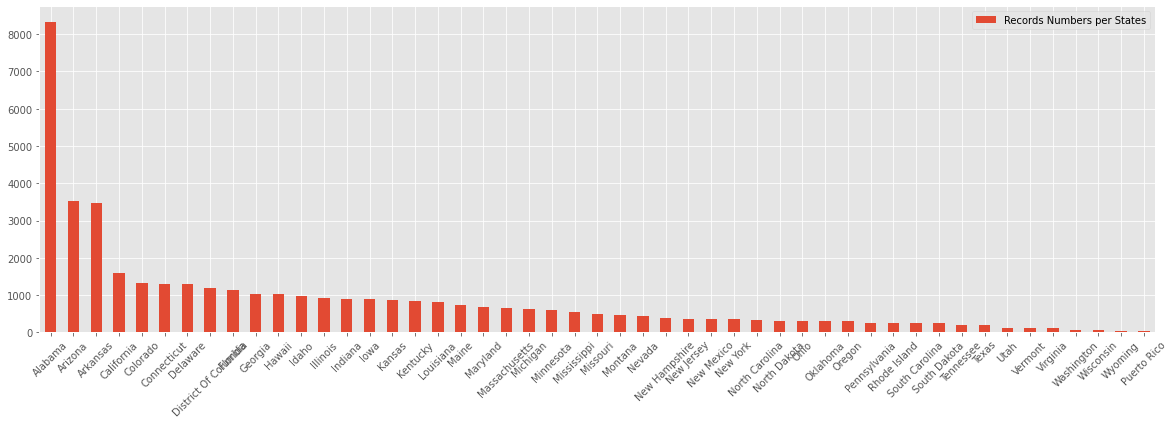

In [9]:
counties = datemask["County Name"].nunique()
print(counties)  #total 231 counties
states = datemask['State Name'].nunique()
print(states)  #total 49 states

state = datemask["State Name"].value_counts().plot(kind='bar')
state.set_xticks(range(states))
state.set_xticklabels(datemask['State Name'].unique(), rotation=45)
state.legend(["Records Numbers per States"])
print()


State Name
Alabama                  1
Arizona                  2
Arkansas                 2
California              31
Colorado                 8
Connecticut              3
Delaware                 1
District Of Columbia     1
Florida                  6
Georgia                  2
Hawaii                   2
Idaho                    1
Illinois                 3
Indiana                  4
Iowa                     2
Kansas                   5
Kentucky                 5
Louisiana                8
Maine                    2
Maryland                 5
Massachusetts            7
Michigan                 4
Minnesota                4
Mississippi              2
Missouri                 4
Montana                  6
Nevada                   2
New Hampshire            1
New Jersey               9
New Mexico               5
New York                 4
North Carolina           4
North Dakota             8
Ohio                     4
Oklahoma                 3
Oregon                   2
Pennsylvania     

<AxesSubplot:xlabel='State Name'>

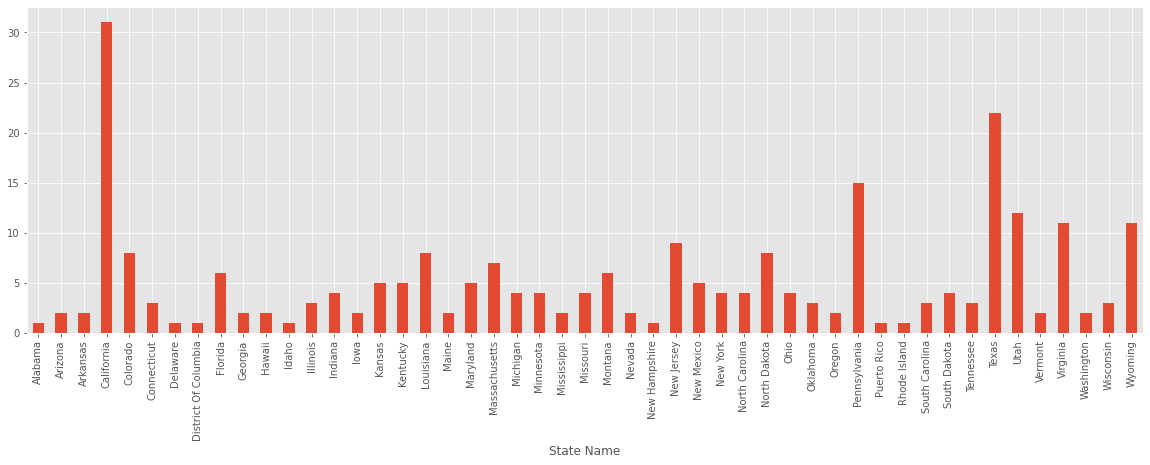

In [254]:
uniqcoun = datemask.groupby('State Name')['County Name'].nunique()
print(uniqcoun)
uniqcoun.plot(kind='bar')

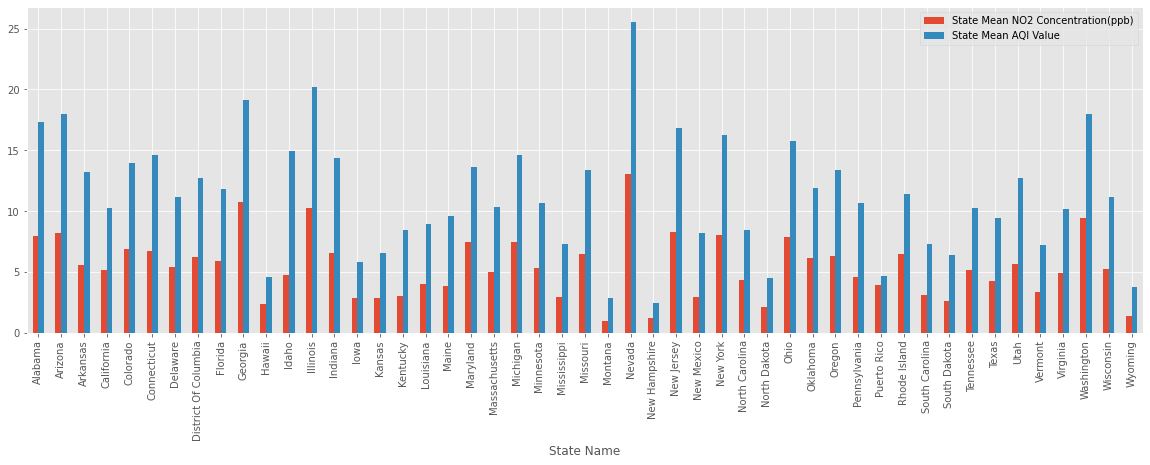

In [256]:
allstate = datemask.groupby('State Name')
stateno2 = allstate['Arithmetic Mean'].mean()
stateaqi = allstate['AQI'].mean()
ax = pd.concat([stateno2, stateaqi], axis=1).plot(kind='bar')
ax.set_xticks(range(len(allstate)))
ax.set_xticklabels(allstate.groups.keys(), rotation=90)
ax.legend(["State Mean NO2 Concentration(ppb)", "State Mean AQI Value"])
print()


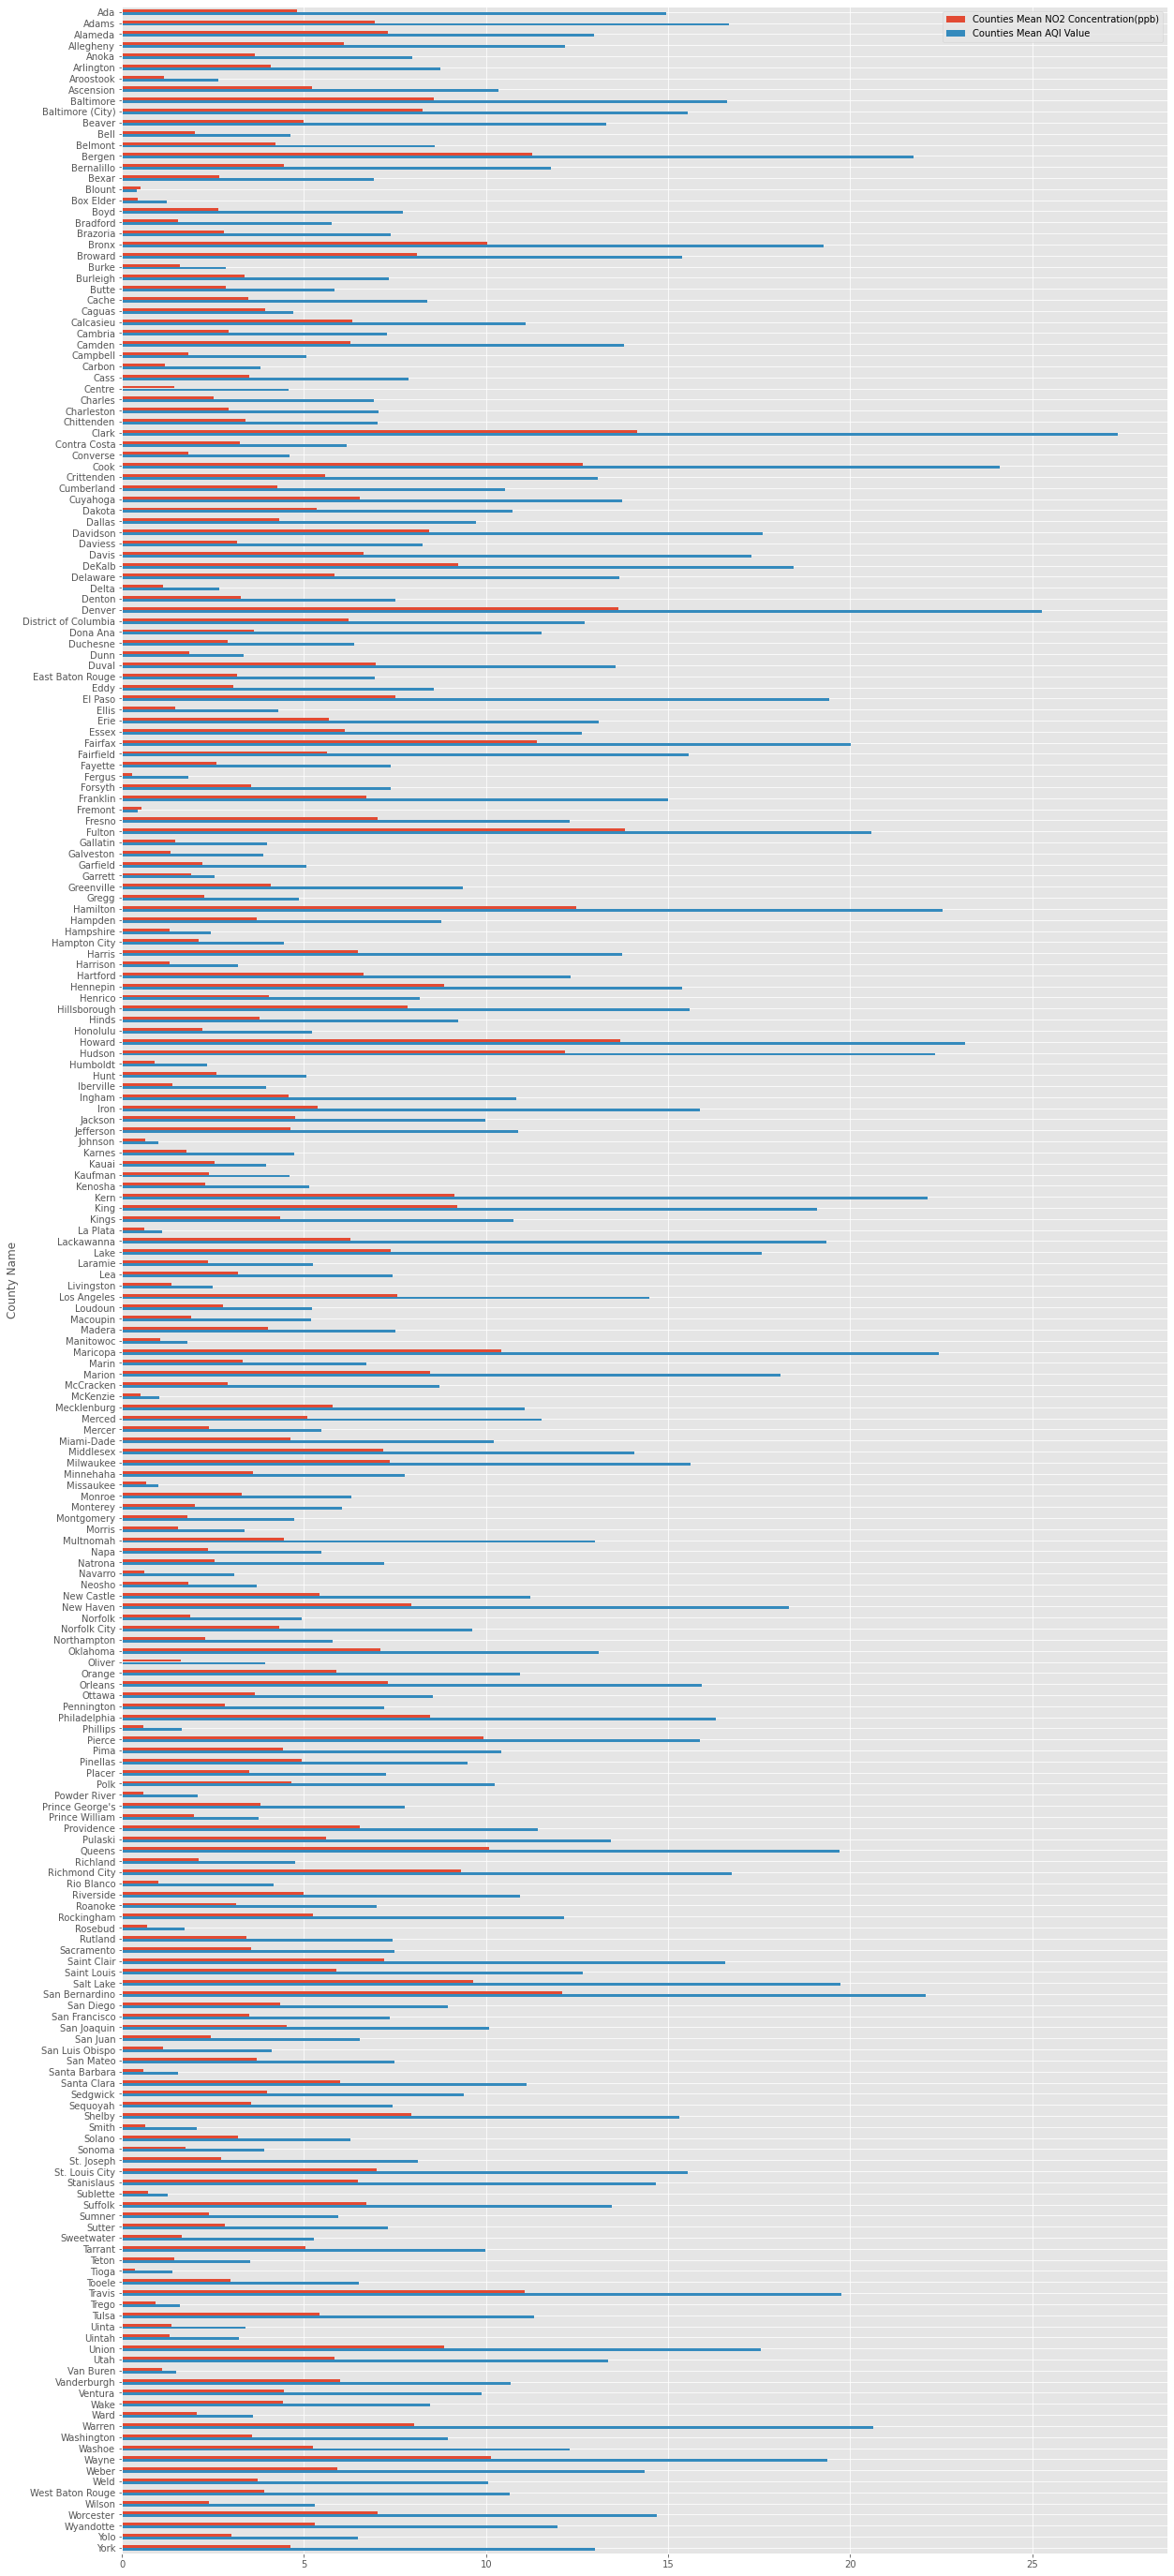

In [278]:
plt.rcParams['figure.figsize'] = (20, 50)
allcounties = datemask.sort_values('County Name').groupby('County Name')
countiesno2 = allcounties['Arithmetic Mean'].mean()
countiesaqi = allcounties['AQI'].mean()
df = pd.concat([countiesno2, countiesaqi], axis=1)
ax2 = df.plot(kind='barh')
ax2.set_yticks(range(len(allcounties)))
ax2.set_yticklabels(allcounties.groups.keys(), rotation=0)
ax2.invert_yaxis()
ax2.legend(["Counties Mean NO2 Concentration(ppb)", "Counties Mean AQI Value"])
print()